# Best Model Evaluation

In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import scikitplot as skplt

import pickle

In [38]:
with open('./pickled_df/results_df_cvec.pkl', 'rb') as f:
    results_df_cvec = pickle.load(f)
    
with open('./pickled_df/results_df_tfidf.pkl', 'rb') as f:
    results_df_tfidf = pickle.load(f)

with open('./pickled_df/auc_roc_curve_df_cvec.pkl', 'rb') as f:
    auc_roc_curve_df_cvec = pickle.load(f)
    
with open('./pickled_df/auc_roc_curve_df_tfidf.pkl', 'rb') as f:
    auc_roc_curve_df_tfidf = pickle.load(f)

In [39]:
def plot_bar_chart(df, title):
    plt.rcParams["figure.figsize"] = (12,6)
    df.plot.bar(y=['Accuracy','Precision','Recall','F1'])
    plt.ylabel('Metrics')
    plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Logistic Regression', 'RandomForest Classifier',
            'Decision Tree Classifier','MultinomialNB',
            'KNeighbors Classifier', 'AdaBoostClassifier',
            'Gradient Boosting Classifier'],
       rotation=20)
    plt.title(title)
    plt.legend(loc="upper center", mode = "contract", ncol = 4)
    plt.show();

Let's take a look at the results of all the models that we have churned out. 
I am more concerned with these matrix:
- Precision
- Recall
- Specificity
- F1
- ROC AUC
- Confusion Matrix
- Execution Time

**Models using CVEC**

In [40]:
results_df_cvec

,Train score,Test score,Generalisation,Accuracy,Precision,Recall,Specificity,F1,ROC AUC,Execution Time
LogisticRegression_CountVectorizer,1.0,0.976,2.4,0.976,0.977,0.971,0.981,0.974,0.9946,00:27:59
RandomForestClassifier_CountVectorizer,1.0,0.967,3.3,0.967,0.975,0.953,0.98,0.964,0.995,00:59:59
DecisionTreeClassifier_CountVectorizer,0.969,0.919,5.16,0.919,0.921,0.901,0.935,0.911,0.9226,00:49:16
MultinomialNB_CountVectorizer,0.934,0.933,0.107,0.933,0.912,0.946,0.922,0.929,0.9698,00:15:08
KNeighborsClassifier_CountVectorizer,1.0,0.788,21.2,0.788,0.749,0.809,0.771,0.778,0.8453,01:32:25
AdaBoostClassifier_CountVectorizer,0.988,0.979,0.911,0.979,0.984,0.97,0.986,0.977,0.9973,01:34:10
GradientBoostingClassifier_CountVectorizer,0.981,0.966,1.529,0.966,0.969,0.956,0.974,0.962,0.9924,01:31:48


In [78]:
print(results_df_cvec.to_markdown())

|                                            |   Train score |   Test score |   Generalisation |   Accuracy |   Precision |   Recall |   Specificity |    F1 |   ROC AUC | Execution Time   |
|:-------------------------------------------|--------------:|-------------:|-----------------:|-----------:|------------:|---------:|--------------:|------:|----------:|:-----------------|
| LogisticRegression_CountVectorizer         |         1     |        0.976 |            2.4   |      0.976 |       0.977 |    0.971 |         0.981 | 0.974 |    0.9946 | 00:27:59         |
| RandomForestClassifier_CountVectorizer     |         1     |        0.967 |            3.3   |      0.967 |       0.975 |    0.953 |         0.98  | 0.964 |    0.995  | 00:59:59         |
| DecisionTreeClassifier_CountVectorizer     |         0.969 |        0.919 |            5.16  |      0.919 |       0.921 |    0.901 |         0.935 | 0.911 |    0.9226 | 00:49:16         |
| MultinomialNB_CountVectorizer              |    

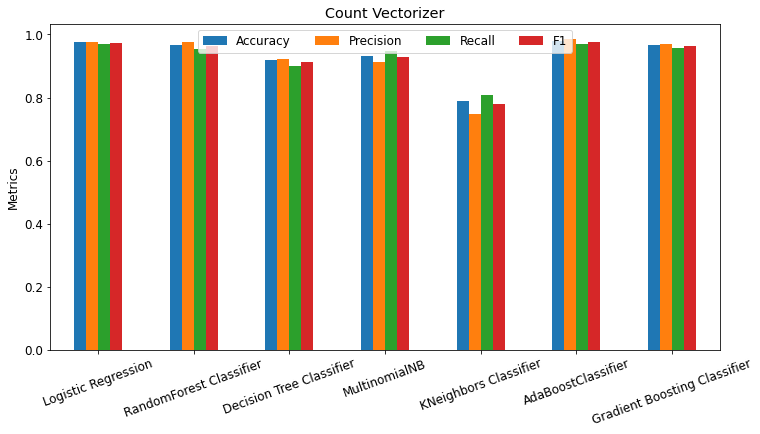

In [41]:
plot_bar_chart(results_df_cvec, 'Count Vectorizer')

**Models using TFIDF**

In [42]:
results_df_tfidf

,Train score,Test score,Generalisation,Accuracy,Precision,Recall,Specificity,F1,ROC AUC,Execution Time
LogisticRegression_TfidfVectorizer,0.982,0.975,0.713,0.975,0.976,0.969,0.98,0.972,0.9962,00:38:14
RandomForestClassifier_TfidfVectorizer,1.0,0.965,3.5,0.965,0.974,0.949,0.978,0.961,0.9943,00:45:47
DecisionTreeClassifier_TfidfVectorizer,0.973,0.913,6.166,0.913,0.903,0.907,0.917,0.905,0.9184,00:46:01
MultinomialNB_TfidfVectorizer,0.924,0.923,0.108,0.923,0.912,0.922,0.925,0.917,0.9765,00:10:56
KNeighborsClassifier_TfidfVectorizer,1.0,0.846,15.4,0.846,0.785,0.913,0.788,0.844,0.9275,01:00:05
AdaBoostClassifier_TfidfVectorizer,0.99,0.98,1.01,0.98,0.982,0.975,0.985,0.978,0.9973,02:15:50
GradientBoostingClassifier_TfidfVectorizer,0.985,0.964,2.132,0.964,0.964,0.958,0.969,0.961,0.9917,01:11:21


In [79]:
print(results_df_tfidf.to_markdown())

|                                            |   Train score |   Test score |   Generalisation |   Accuracy |   Precision |   Recall |   Specificity |    F1 |   ROC AUC | Execution Time   |
|:-------------------------------------------|--------------:|-------------:|-----------------:|-----------:|------------:|---------:|--------------:|------:|----------:|:-----------------|
| LogisticRegression_TfidfVectorizer         |         0.982 |        0.975 |            0.713 |      0.975 |       0.976 |    0.969 |         0.98  | 0.972 |    0.9962 | 00:38:14         |
| RandomForestClassifier_TfidfVectorizer     |         1     |        0.965 |            3.5   |      0.965 |       0.974 |    0.949 |         0.978 | 0.961 |    0.9943 | 00:45:47         |
| DecisionTreeClassifier_TfidfVectorizer     |         0.973 |        0.913 |            6.166 |      0.913 |       0.903 |    0.907 |         0.917 | 0.905 |    0.9184 | 00:46:01         |
| MultinomialNB_TfidfVectorizer              |    

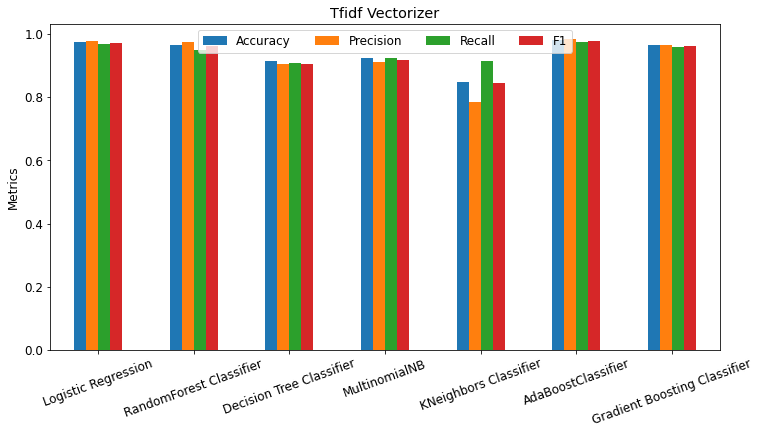

In [43]:
plot_bar_chart(results_df_tfidf, 'Tfidf Vectorizer')

**TFIDF Adaboost**
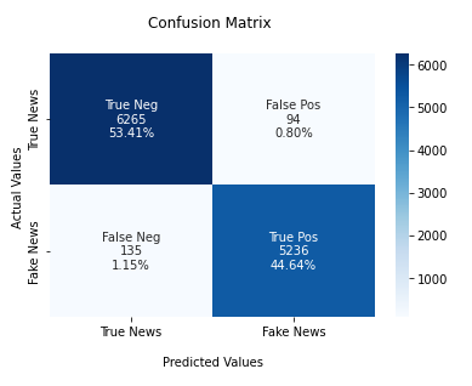

**TFIDF Logistic Regression**
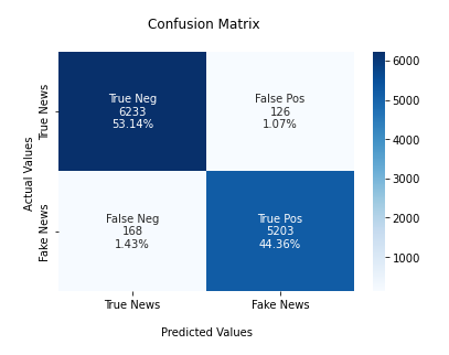

- Based on the considered matrix, LogisticRegression with TFIDF seems to be the best performing.
- Even though the metrics for Adaboost is slightly better than Logistic Regression, the differenece is very small. What differentiate between the two models is the execution time. Logistic Regression is far more efficient. 

In [44]:
#define function to get value from auc_roc_curve_df
def curve_filter(model,col):
    return auc_roc_curve_df_cvec.loc[model, col]

In [45]:
#define function to get value from auc_roc_curve_df
def curve_filter2(model,col):
    return auc_roc_curve_df_tfidf.loc[model, col]

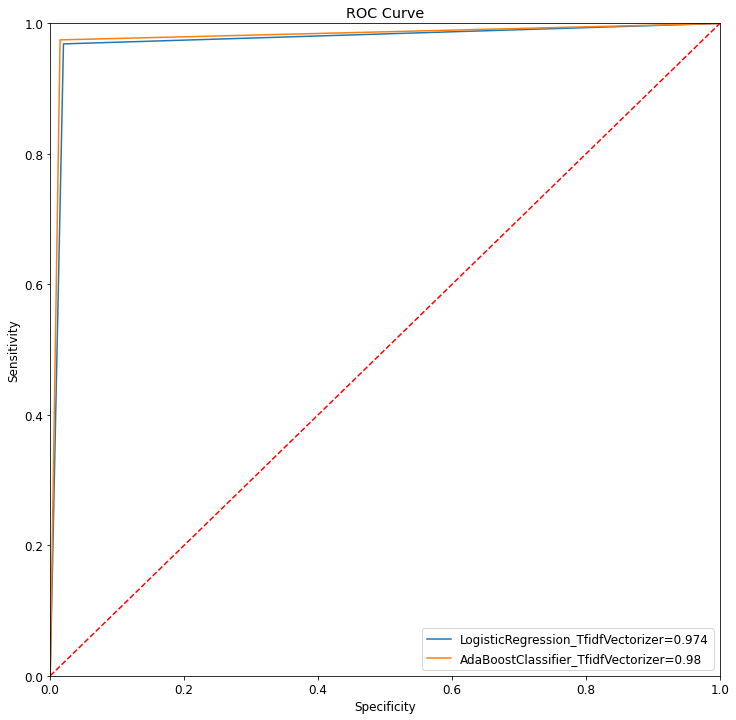

In [46]:
#plot ROC curves
plt.figure(figsize=(12,12))
#create ROC curve


plt.plot(curve_filter2('LogisticRegression_TfidfVectorizer','fpr'),
         curve_filter2('LogisticRegression_TfidfVectorizer','tpr'),
         label="LogisticRegression_TfidfVectorizer="+str(curve_filter2('LogisticRegression_TfidfVectorizer','auc_metrics')))
plt.plot(curve_filter2('AdaBoostClassifier_TfidfVectorizer','fpr'),
         curve_filter2('AdaBoostClassifier_TfidfVectorizer','tpr'),
         label="AdaBoostClassifier_TfidfVectorizer="+str(curve_filter2('AdaBoostClassifier_TfidfVectorizer','auc_metrics')))
# Set limit
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12

# Plot random
plt.plot([0, 1], [0, 1],'r--')

# axis labels
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')

# show title
plt.title("ROC Curve")

plt.legend(loc=4)
plt.show()

In [47]:
with open('./models/gs_LogisticRegression_TfidfVectorizer.sav', 'rb') as f:
    RF_cvec_params = pickle.load(f)
    
with open('./pickled_df/preprocess_df.pkl', 'rb') as f:
    df = pickle.load(f)

In [48]:
#df = df.sample(n=100, random_state=42)

In [49]:
# Setting up the predictors and target variables
X = df["title_text"]
y = df["target"]

In [50]:
# Train-test-split, 70-30 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

In [51]:
#check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27367,), (11730,), (27367,), (11730,))

In [52]:
y_train.value_counts(normalize = True)

0    0.542149
1    0.457851
Name: target, dtype: float64

In [53]:
RF_cvec_params

{'tf__stop_words': ['trump',
  'said',
  'state',
  'president',
  'republican',
  'clinton',
  'house',
  'people',
  'obama',
  'reuters',
  'white',
  'donald',
  'new',
  'government',
  'year',
  'election',
  'party',
  'video',
  'say',
  'campaign'],
 'tf__ngram_range': (1, 2),
 'tf__min_df': 4,
 'tf__max_features': 3000,
 'tf__max_df': 0.9,
 'mdl__max_iter': 10000,
 'mdl__class_weight': 'balanced'}

In [55]:
add_excluded_words = ['trump',
  'said',
  'state',
  'president',
  'republican',
  'clinton',
  'house',
  'people',
  'obama',
  'reuters',
  'white',
  'donald',
  'new',
  'government',
  'year',
  'election',
  'party',
  'video',
  'say',
  'campaign']

In [56]:
#Apply optimized cvec parameters
vect = TfidfVectorizer(stop_words=add_excluded_words, ngram_range=(
    1, 2), max_df=0.9, min_df=4, max_features=3000)

# Fit_transform our X_train dataset using the most optimal parameters
X_train_vect = vect.fit_transform(X_train)
X_train_vect = pd.DataFrame(X_train_vect.toarray(),
                            columns=vect.get_feature_names_out())
X_test_vect = vect.transform(X_test)
X_test_vect = pd.DataFrame(X_test_vect.toarray(),
                           columns=vect.get_feature_names_out())
print('CountVectorizer:')
print(X_train_vect.sum().sort_values(ascending=False)[:5])
print()

CountVectorizer:
would      693.365670
one        501.551397
hillary    427.511177
also       415.501318
country    415.051514
dtype: float64



In [57]:
# put the two functions above together, using 'write binary' permissions
pickle.dump(vect, open('./models/vect.p', 'wb'))

In [58]:
# Fitting model to the optimized training data
#instatiate
model = LogisticRegression(max_iter = 1000,class_weight= 'balanced')

#fit model
model.fit(X_train_vect, y_train)

#predict
y_pred = model.predict(X_test_vect)

print('Model accuracy on train set:', round(model.score(X_train_vect, y_train),3))
print('Model accuracy on test set:', round(model.score(X_test_vect, y_test),3))

Model accuracy on train set: 0.982
Model accuracy on test set: 0.975


In [59]:
# put the two functions above together, using 'write binary' permissions
pickle.dump(model, open('./models/model.p', 'wb'))

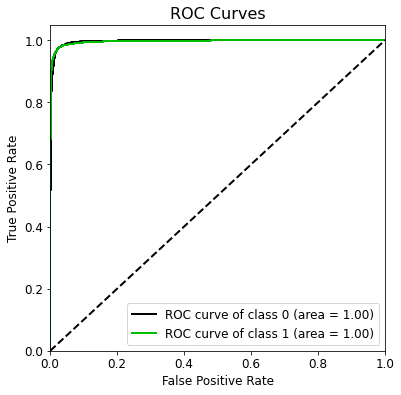

In [60]:
# Ground truth labels (y_test)
y_true = y_test

# Predicted probabilities generated by sklearn classifier (y_hat)
y_probas = model.predict_proba(X_test_vect)

skplt.metrics.plot_roc(y_true, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(6,6),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()
# Class 0 is Real news
# Class 1 is Fake news

In [61]:
# Saving the LogReg coefficients
model_coefficients = pd.Series(model.coef_[0])   # To create 1D array

In [62]:
# Saving the vocabulary list and word count
vocab_train = vect.get_feature_names_out()

In [63]:
# Creating a dataframe of vocabulary and their coefficients
key_classifier_words = pd.DataFrame([vocab_train, model_coefficients],
                                    index=["words", "model_coeff"]).T
key_classifier_words.head(10)

,words,model_coeff
0,abc,0.441047
1,abe,-0.545278
2,ability,0.257971
3,able,0.347478
4,abortion,-0.193964
5,abroad,-1.003317
6,absolutely,0.699026
7,abuse,-0.82964
8,accept,-0.145133
9,accepted,-0.641225


In [64]:
# Transforming the natural log
key_classifier_words["coeffs"] = key_classifier_words["model_coeff"].apply(lambda x: np.exp(x))

In [65]:
key_classifier_words = key_classifier_words.sort_values(by=["coeffs"], ascending=False)

In [66]:
# Top 10 Fake news words
key_classifier_words.head(10)

,words,model_coeff,coeffs
2850,via,10.124358,24943.232161
1275,image,9.295049,10883.999419
1138,gop,5.711641,302.366860
1222,hillary,5.672721,290.824683
1276,image via,5.666677,289.072343
332,breaking,4.689381,108.785788
905,even,4.687746,108.608061
2901,watch,4.513573,91.247239
111,america,4.409011,82.188178
1728,mr,4.363086,78.498973


In [67]:
# Top 10 Real news words
key_classifier_words.tail(10).sort_values(by=["coeffs"], ascending=True)

,words,model_coeff,coeffs
2898,washington,-8.882964,0.000139
2782,tuesday,-6.758086,0.001161
2914,wednesday,-6.713085,0.001215
2711,thursday,-6.451858,0.001578
1081,friday,-5.993134,0.002496
1711,monday,-5.664937,0.003465
2550,statement,-4.918949,0.007307
1807,nov,-4.54244,0.010647
2029,presidential,-4.377263,0.012560
2528,spokesman,-4.306646,0.013479


In [68]:
# creating index of feature names
index = vect.get_feature_names_out()

In [69]:
# making df of features w/coefs
model_coef_df = pd.DataFrame(model.coef_[0],
                         columns=["coef"],
                         index=index)
# sorting for highest coef
model_coef_df = model_coef_df.sort_values("coef", ascending=False)
model_coef_df.head()

,coef
via,10.124358
image,9.295049
gop,5.711641
hillary,5.672721
image via,5.666677


In [70]:
# isolating top and bottom coefs
model_coef_odds = pd.concat(objs=[model_coef_df.head(10), model_coef_df.tail(10)])

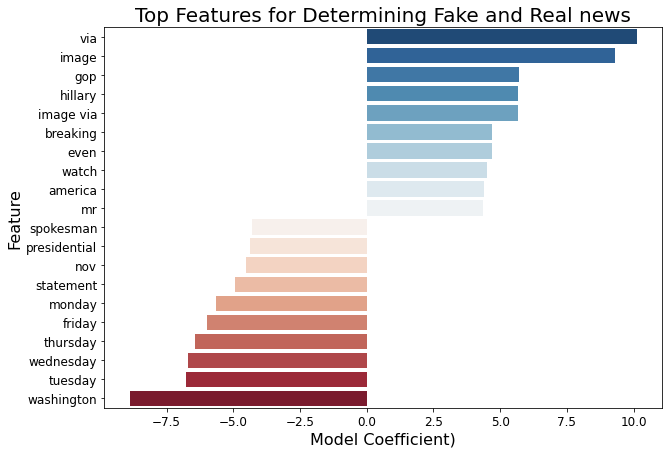

In [71]:
# plotting most significant coefs
plt.figure(figsize=(10, 7))
sns.barplot(data=model_coef_odds,
            x="coef",
            y=model_coef_odds.index,
            palette="RdBu_r")
plt.title("Top Features for Determining Fake and Real news", size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.ylabel("Feature", size=16)
plt.xlabel("Model Coefficient)", size=16);

## False Positive Posts

In [72]:
false_positives = X_test[(y_test == 0) & (y_pred == 1)]
fp_index = false_positives.head(1).index

In [73]:
# Printing the first false-positive posts 
# Using the row indexes
    
for i in fp_index:
    print(f'#{i} {false_positives[i]}\n')

#26572 dreamer left confused fine point immigration program end new york reuters day president donald trump decision end deferred action childhood arrival program mayara pena still lot unanswered question one car march leased honda personal use brand new dodge van small construction business owns tuesday pena came united state brazil teenager learned authorization work protection deportation daca lapse car lease point social security number pena used lease longer valid moreover massachusetts yearold life soon require proof legal residency obtain driver license pena worry mean existing license car insurance ending program trump said want republicancontrolled congress enact permanent nationwide solution stabilize life socalled dreamer pena people brought united state illegally child past republican democrat deeply divided legislature unable agree issue administration promised orderly end daca program participant finding hard get answer many question exactly mean although program federal 

## Manual Testing

In [36]:
#initialise lemmatizer
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [44]:
#function for preprocess
def preprocess(news):
    corpus =[]
    news = re.sub(r'https?://\S+|www\.\S+', '', news) #remove URL
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});") #define html tags
    news = re.sub(html, "", news) #remove html tags
    news = re.sub(r'[^\x00-\x7f]','', news) #remove non-ascii 
    news = re.sub(r'[^a-zA-Z\s]', '', news) #remove non-letters
    news = news.lower() #convert all characters to lower caps
    news = nltk.word_tokenize(news) #covert string of text into token within list
    for y in news :
        if y not in stpwrds : #remove stopwords
            corpus.append(lemmatizer.lemmatize(y))
    news = ' '.join(corpus) #rejoin words into strings
    
    return news

In [45]:
news_headline = input('Enter a piece of text: ')
preprocess(news_headline)
data = vect.transform([news_headline]).toarray()

Enter a piece of text: dreamer left confused fine point immigration program end new york reuters day president donald trump decision end deferred action childhood arrival program mayara pena still lot unanswered question one car march leased honda personal use brand new dodge van small construction business owns tuesday pena came united state brazil teenager learned authorization work protection deportation daca lapse car lease point social security number pena used lease longer valid moreover massachusetts yearold life soon require proof legal residency obtain driver license pena worry mean existing license car insurance ending program trump said want republicancontrolled congress enact permanent nationwide solution stabilize life socalled dreamer pena people brought united state illegally child past republican democrat deeply divided legislature unable agree issue administration promised orderly end daca program participant finding hard get answer many question exactly mean although 

In [46]:
result = model.predict(data)
result

C:\Users\rohaz\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int64)

In [47]:
if result == 1:
    print('Fake News!')
elif result == 0:
    print("Real News!")

Fake News!
